# This is a take home assignment from IIT Roorkee for testing Advanced Machine Learning Algorithms on Indian Liver Patient Dataset.

## Problem Statement
Download the Liver patient data from the following sources:
https://www.kaggle.com/uciml/indian-liver-patient-records
Use the following 07 features from this dataset:
* Age; 
* Total_Bilirubin; 
* Direct_Bilirubin; 
* Alkaline_Phosphotase;
* Alamine_Aminotransferase;
* Total_Protiens; 
* Albumin

Your task is to predict whether a patient suffers from a liver disease using above
features. Split your data into test and train.
First use a random forest algorithm for performing this task.
Then, use a Adaboost Classifier to perform similar task.
Compare the accuracy of these two algorithms.

# 1.0.1 Dataset context

The Indian Liver Patients Dataset is generated from a study done on liver patients in the North East region of Andhra Pradesh, India. This region, where I come from, sees a high rate of alcohol abuse, which is a leading cause of liver health issues. 

This region also typically sees males consuming more alcohol than females, so we may expect to see a higher prevalance of liver disorders among males than in females. The feature descriptions are self-explanatory, so let's dive into the addressing the problem at hand.

The problem relates to predicting whether a subject suffers from a liver disease, based on liver function diagnostic results. There are 167 healthy subjects and 416 patients in this dataset, encoded as 2 & 1, respectively. I will train and compare the performances of two different Advanced Machine Learning Classifiers - AdaBoostClassifier and RandomForestClassifier, for this purpose.

# 1.0.2 Workflow:



1. Loading the dataset
2. Exploratory Data Analysis, Missing Values handling, Feature Engineering
3. Model Training, Hyperparameter Tuning and Evaluation
4. Conclusion: Comparison of Estimators




# 1.1 Import block and loading the dataset


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set plot style
#sns.set(color_codes=True)
%matplotlib inline
plt.rcParams['figure.figsize']=15,8
pd.pandas.set_option('display.max_columns', None)
pd.pandas.set_option('display.float_format', lambda x: '%.3f' % x)

In [4]:
liv = pd.read_csv('/kaggle/input/indian-liver-patient-records/indian_liver_patient.csv')

In [5]:
liv.rename(columns = {'Dataset':'liver_disease_YN'}, inplace =True)

In [6]:
df = liv.copy()

# 1.2 Exploratory Data Analysis, Feature Engineering

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  liver_disease_YN            583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [8]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,liver_disease_YN
count,583.000,583.000,583.000,583.000,583.000,583.000,583.000,583.000,579.000,583.000
mean,44.746,3.299,1.486,290.576,80.714,109.911,6.483,3.142,0.947,1.286
std,16.190,6.210,2.808,242.938,182.620,288.919,1.085,0.796,0.320,0.452
min,4.000,0.400,0.100,63.000,10.000,10.000,2.700,0.900,0.300,1.000
25%,33.000,0.800,0.200,175.500,23.000,25.000,5.800,2.600,0.700,1.000
50%,45.000,1.000,0.300,208.000,35.000,42.000,6.600,3.100,0.930,1.000
75%,58.000,2.600,1.300,298.000,60.500,87.000,7.200,3.800,1.100,2.000
max,90.000,75.000,19.700,2110.000,2000.000,4929.000,9.600,5.500,2.800,2.000


In [9]:
df.liver_disease_YN.value_counts() #416 diseased and 167 healthy

1    416
2    167
Name: liver_disease_YN, dtype: int64

In [10]:
df.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
liver_disease_YN              0
dtype: int64

In [11]:
df[df.Albumin_and_Globulin_Ratio.isna()]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,liver_disease_YN
209,45,Female,0.900,0.300,189,23,33,6.600,3.900,NaN,1
241,51,Male,0.800,0.200,230,24,46,6.500,3.100,NaN,1
253,35,Female,0.600,0.200,180,12,15,5.200,2.700,NaN,2
312,27,Male,1.300,0.600,106,25,54,8.500,4.800,NaN,2


In [12]:
df.groupby('Gender').agg({'Albumin_and_Globulin_Ratio':'median'})

,Albumin_and_Globulin_Ratio
Gender,
Female,0.900
Male,0.960


#### I'll encode the Gender feature and impute missing values in the Albumin_and_Globulin_Ratio.

In [13]:
gender_replace_dict = {'Male':0, 'Female':1}
df.replace(gender_replace_dict, inplace = True)

target_replace_dict = {1:1, 2:0}
df['liver_disease_YN'].replace(target_replace_dict, inplace = True)

In [14]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

df = imputer.fit_transform(df)
df = pd.DataFrame(df, columns = liv.columns)

In [15]:
df.skew()

Age                          -0.029
Gender                        1.198
Total_Bilirubin               4.907
Direct_Bilirubin              3.212
Alkaline_Phosphotase          3.765
Alamine_Aminotransferase      6.549
Aspartate_Aminotransferase   10.546
Total_Protiens               -0.286
Albumin                      -0.044
Albumin_and_Globulin_Ratio    0.997
liver_disease_YN             -0.947
dtype: float64

#### Some features like Total_Bilirubin, Direct_Bilirubin, Alkaline_Phosphotase, Alamine_Aminotransferase, Aspartate_Aminotransferase are heavily skewed to the right, probably due to outliers. Lets log-normalize these features to improve model performance.

Skewness of log transformed features:
log_Total_Bilirubin :	 1.7280754389111663
log_Direct_Bilirubin :	 1.688720802561033
log_Alkaline_Phosphotase :	 1.331076619731195
log_Alamine_Aminotransferase :	 1.4737740594908912
log_Aspartate_Aminotransferase :	 1.2327417878357545


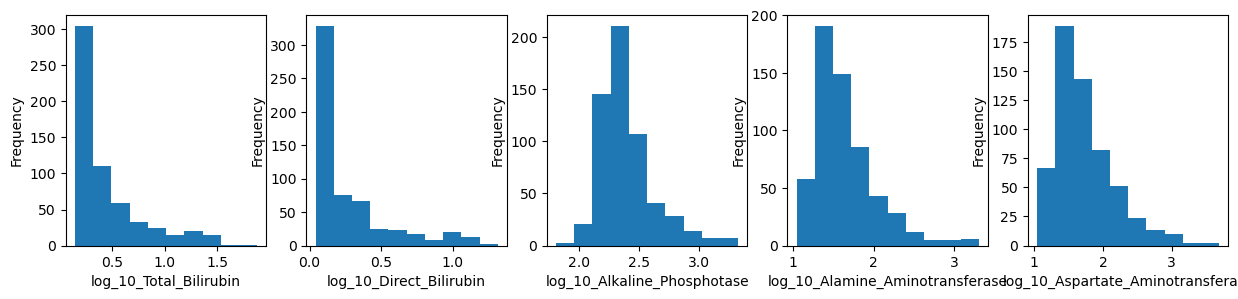

In [16]:
## Adding new log transformed features and visualizing their distributions

skewed_features = ['Total_Bilirubin',\
                   'Direct_Bilirubin', \
                   'Alkaline_Phosphotase', \
                   'Alamine_Aminotransferase', \
                   'Aspartate_Aminotransferase']

fig = plt.figure(figsize=(15,3))

print('Skewness of log transformed features:')
for idx, feature in enumerate(skewed_features):
    new_name = f'log_{feature}'
    df[new_name] = np.log10(df[feature]+1) #add 1 to features with 0 values to prevent -np.inf during log transform  
    print(new_name, ':\t', df[new_name].skew())

    sub = fig.add_subplot(1,5,idx+1) 
    sub.set_xlabel(f'log_10_{feature}')
    df[new_name].plot(kind='hist')

In [17]:
df.drop(skewed_features, axis = 1, inplace= True)

# 1.2.1 Univariate Analysis

In [18]:
df.columns

Index(['Age', 'Gender', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'liver_disease_YN', 'log_Total_Bilirubin',
       'log_Direct_Bilirubin', 'log_Alkaline_Phosphotase',
       'log_Alamine_Aminotransferase', 'log_Aspartate_Aminotransferase'],
      dtype='object')

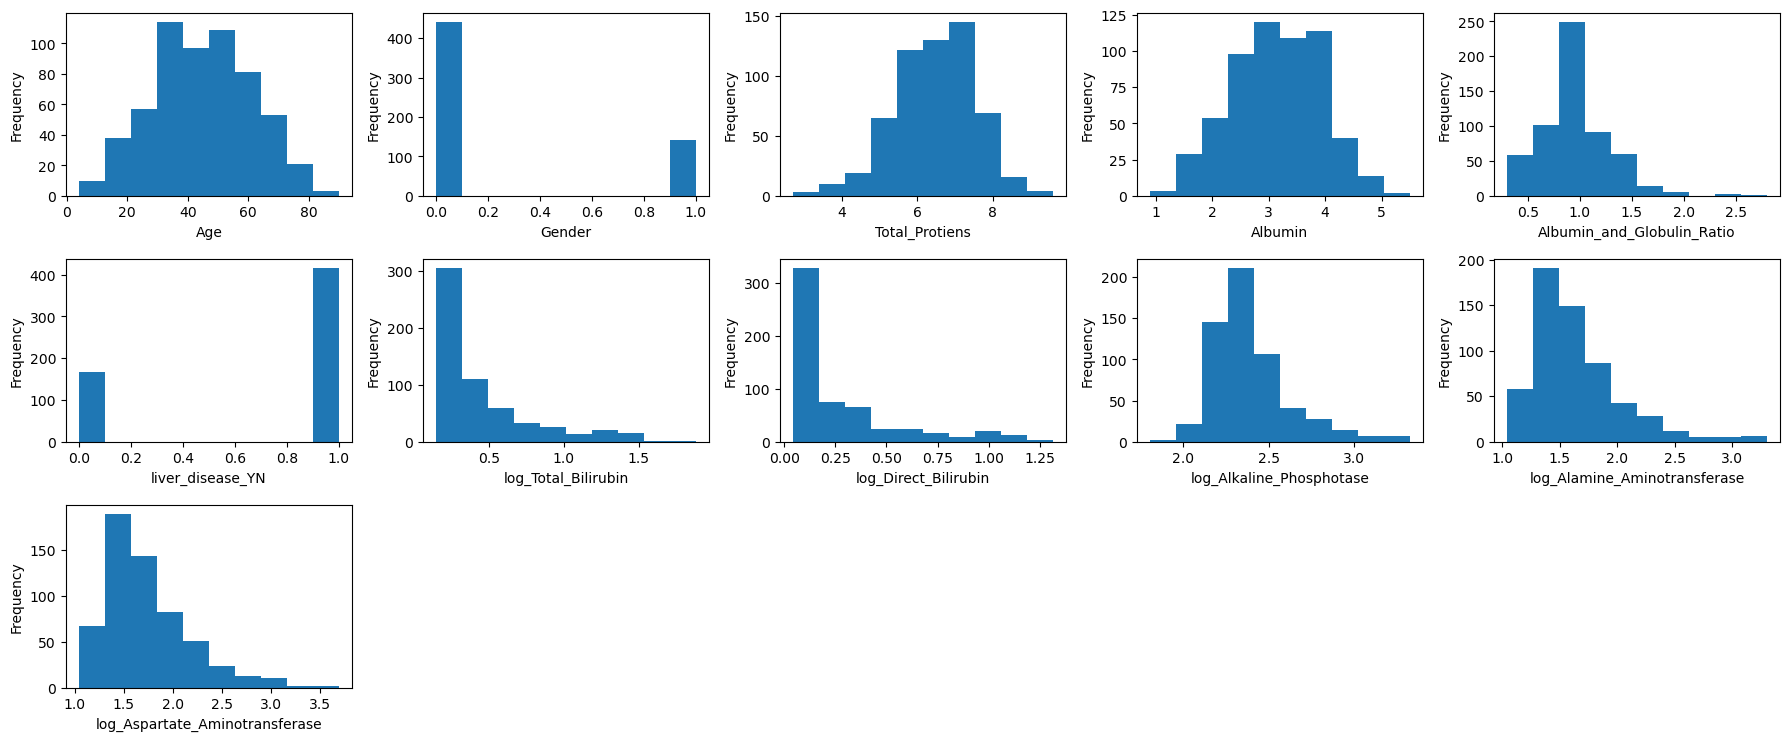

In [19]:
## Lets visualize the distributions of our features

fig = plt.figure(figsize = (18,12))

for idx, feature in enumerate(df.columns):
    sub = fig.add_subplot(5,5,idx+1)
    sub.set_xlabel(feature)
    df[feature].plot(kind='hist')
    plt.tight_layout()


#### This is interesting. The following observations can be made from these plots.


1.   The median age of the participants is in the late 30s to early 40s range.
2.   More males have participated than females in the Liver health study. 
3. My initial hypothesis was that males in this geographical region have been facing higher amount of liver issues. Let's find out if this is the case in the next set of visualizations.
4. We do not have baseline values for healthy people in the dataset's Kaggle page, nor in the feature descripion. I will attempt to find this out using the groupby function for healthy livers (df.liver_disease_YN == 0).

In [20]:
## Artificial Baseline, Mean (not verified against medical standards)
baseline_avg = df[df.liver_disease_YN == 0].groupby('Gender').mean()
baseline_avg

,Age,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,liver_disease_YN,log_Total_Bilirubin,log_Direct_Bilirubin,log_Alkaline_Phosphotase,log_Alamine_Aminotransferase,log_Aspartate_Aminotransferase
Gender,,,,,,,,,,
0.000,40.598,6.527,3.342,1.038,0.000,0.320,0.140,2.312,1.492,1.558
1.000,42.740,6.580,3.350,1.006,0.000,0.271,0.097,2.286,1.416,1.457


In [21]:
df[df.liver_disease_YN == 1].groupby('Gender').mean()

,Age,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,liver_disease_YN,log_Total_Bilirubin,log_Direct_Bilirubin,log_Alkaline_Phosphotase,log_Alamine_Aminotransferase,log_Aspartate_Aminotransferase
Gender,,,,,,,,,,
0.000,46.951,6.393,3.012,0.913,1.000,0.546,0.343,2.418,1.745,1.852
1.000,43.348,6.693,3.232,0.918,1.000,0.422,0.233,2.432,1.597,1.669


#### The above mean values seems very off, with significantly different values for Males and Females. Since mean is susceptible to outliers, lets redo this with median and compare the baseline median values of healthy subjects against subjects with liver disease (df.liver_disease_YN == 1).


In [22]:
## Artificial Baseline, Median (not verified against medical standards)
baseline_median = df[df.liver_disease_YN == 0].groupby('Gender').median()
baseline_median

,Age,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,liver_disease_YN,log_Total_Bilirubin,log_Direct_Bilirubin,log_Alkaline_Phosphotase,log_Alamine_Aminotransferase,log_Aspartate_Aminotransferase
Gender,,,,,,,,,,
0.000,40.000,6.500,3.500,1.000,0.000,0.255,0.079,2.270,1.462,1.491
1.000,39.500,6.750,3.250,0.965,0.000,0.255,0.079,2.276,1.398,1.447


In [23]:
df[df.liver_disease_YN == 1].groupby('Gender').median()

,Age,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,liver_disease_YN,log_Total_Bilirubin,log_Direct_Bilirubin,log_Alkaline_Phosphotase,log_Alamine_Aminotransferase,log_Aspartate_Aminotransferase
Gender,,,,,,,,,,
0.000,47.000,6.400,3.000,0.900,1.000,0.431,0.243,2.366,1.658,1.756
1.000,45.000,6.800,3.300,0.900,1.000,0.279,0.079,2.311,1.447,1.531


#### Observations:
1. A simple visual comparison between the tables reveals that in general, people with liver issues have higher feature medians than those with healthy livers, for both genders.
2. Albumin to Globulin ratio is lower for those with liver disease, for both genders.
3. The median age for those with liver disease is higher for both genders, as compared to the complete group. This seems to indicate that older population in the region are more susceptible to liver disease. Could this be because of poor socio-economic conditions, access to disposable incomes leading to alcohol abuse, shortage of medical services?

#### Let's verify the above observations visually, and understand the distribution of features across the binary groups, Gender and Liver Disease.

{'Male': 0, 'Female': 1}


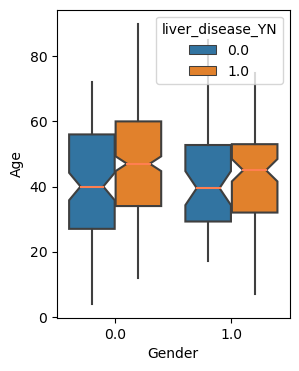

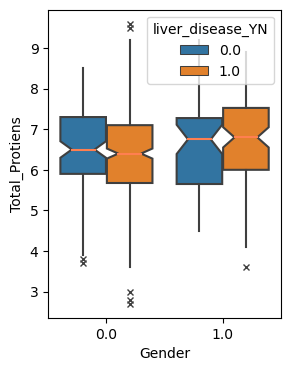

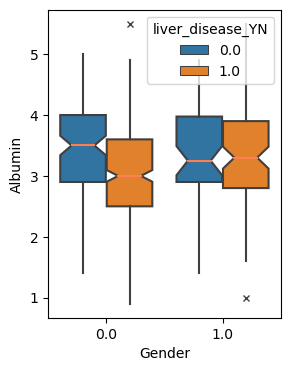

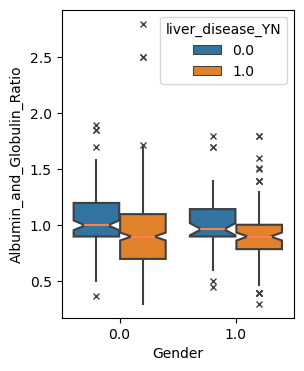

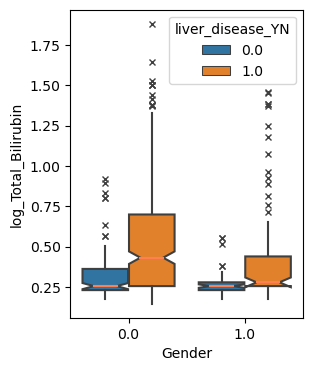

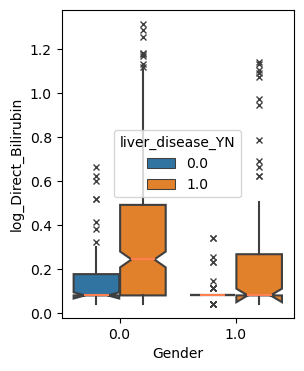

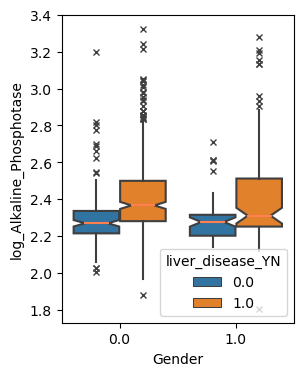

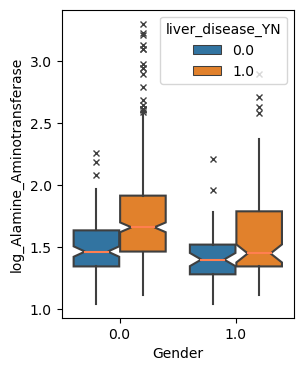

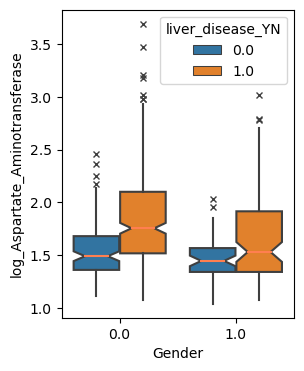

In [24]:
print(gender_replace_dict)

for feature in df.drop(['Gender', 'liver_disease_YN'],axis=1).columns:
    plt.figure(figsize=(3,4))
    sns.boxplot(df, x = 'Gender', y = feature, notch = True, flierprops={"marker": "x"},
                showcaps=False, medianprops={"color": "coral"}, hue = 'liver_disease_YN', dodge = True) #customizing the boxplots
    fig.savefig(f'barplot_{feature}_gender.png', bbox_inches='tight')
    plt.show();

#### Observations
1. Within each gender, feature medians tend to be higher for those with liver disease as opposed to healthy subjects. An excpetion to this is 2 features - Albumin, Albumin-Globulin ratio, where diseased subjects tend to score lower.

2. The feature 'Total_Protiens' doesn't provide additional insights within the gender groups, and across the target (diseased or not) groups.

3. There's too much of an overlap of the Inter Quartile Range of the barplots to infer conclusively, that any of the features influence liver disease for either genders. I suspect a one-way ANOVA test between the named groups would give different insights, so I'll move forward with the analysis.

# 1.2.2 Multivariate Analysis

<Figure size 1600x2000 with 0 Axes>

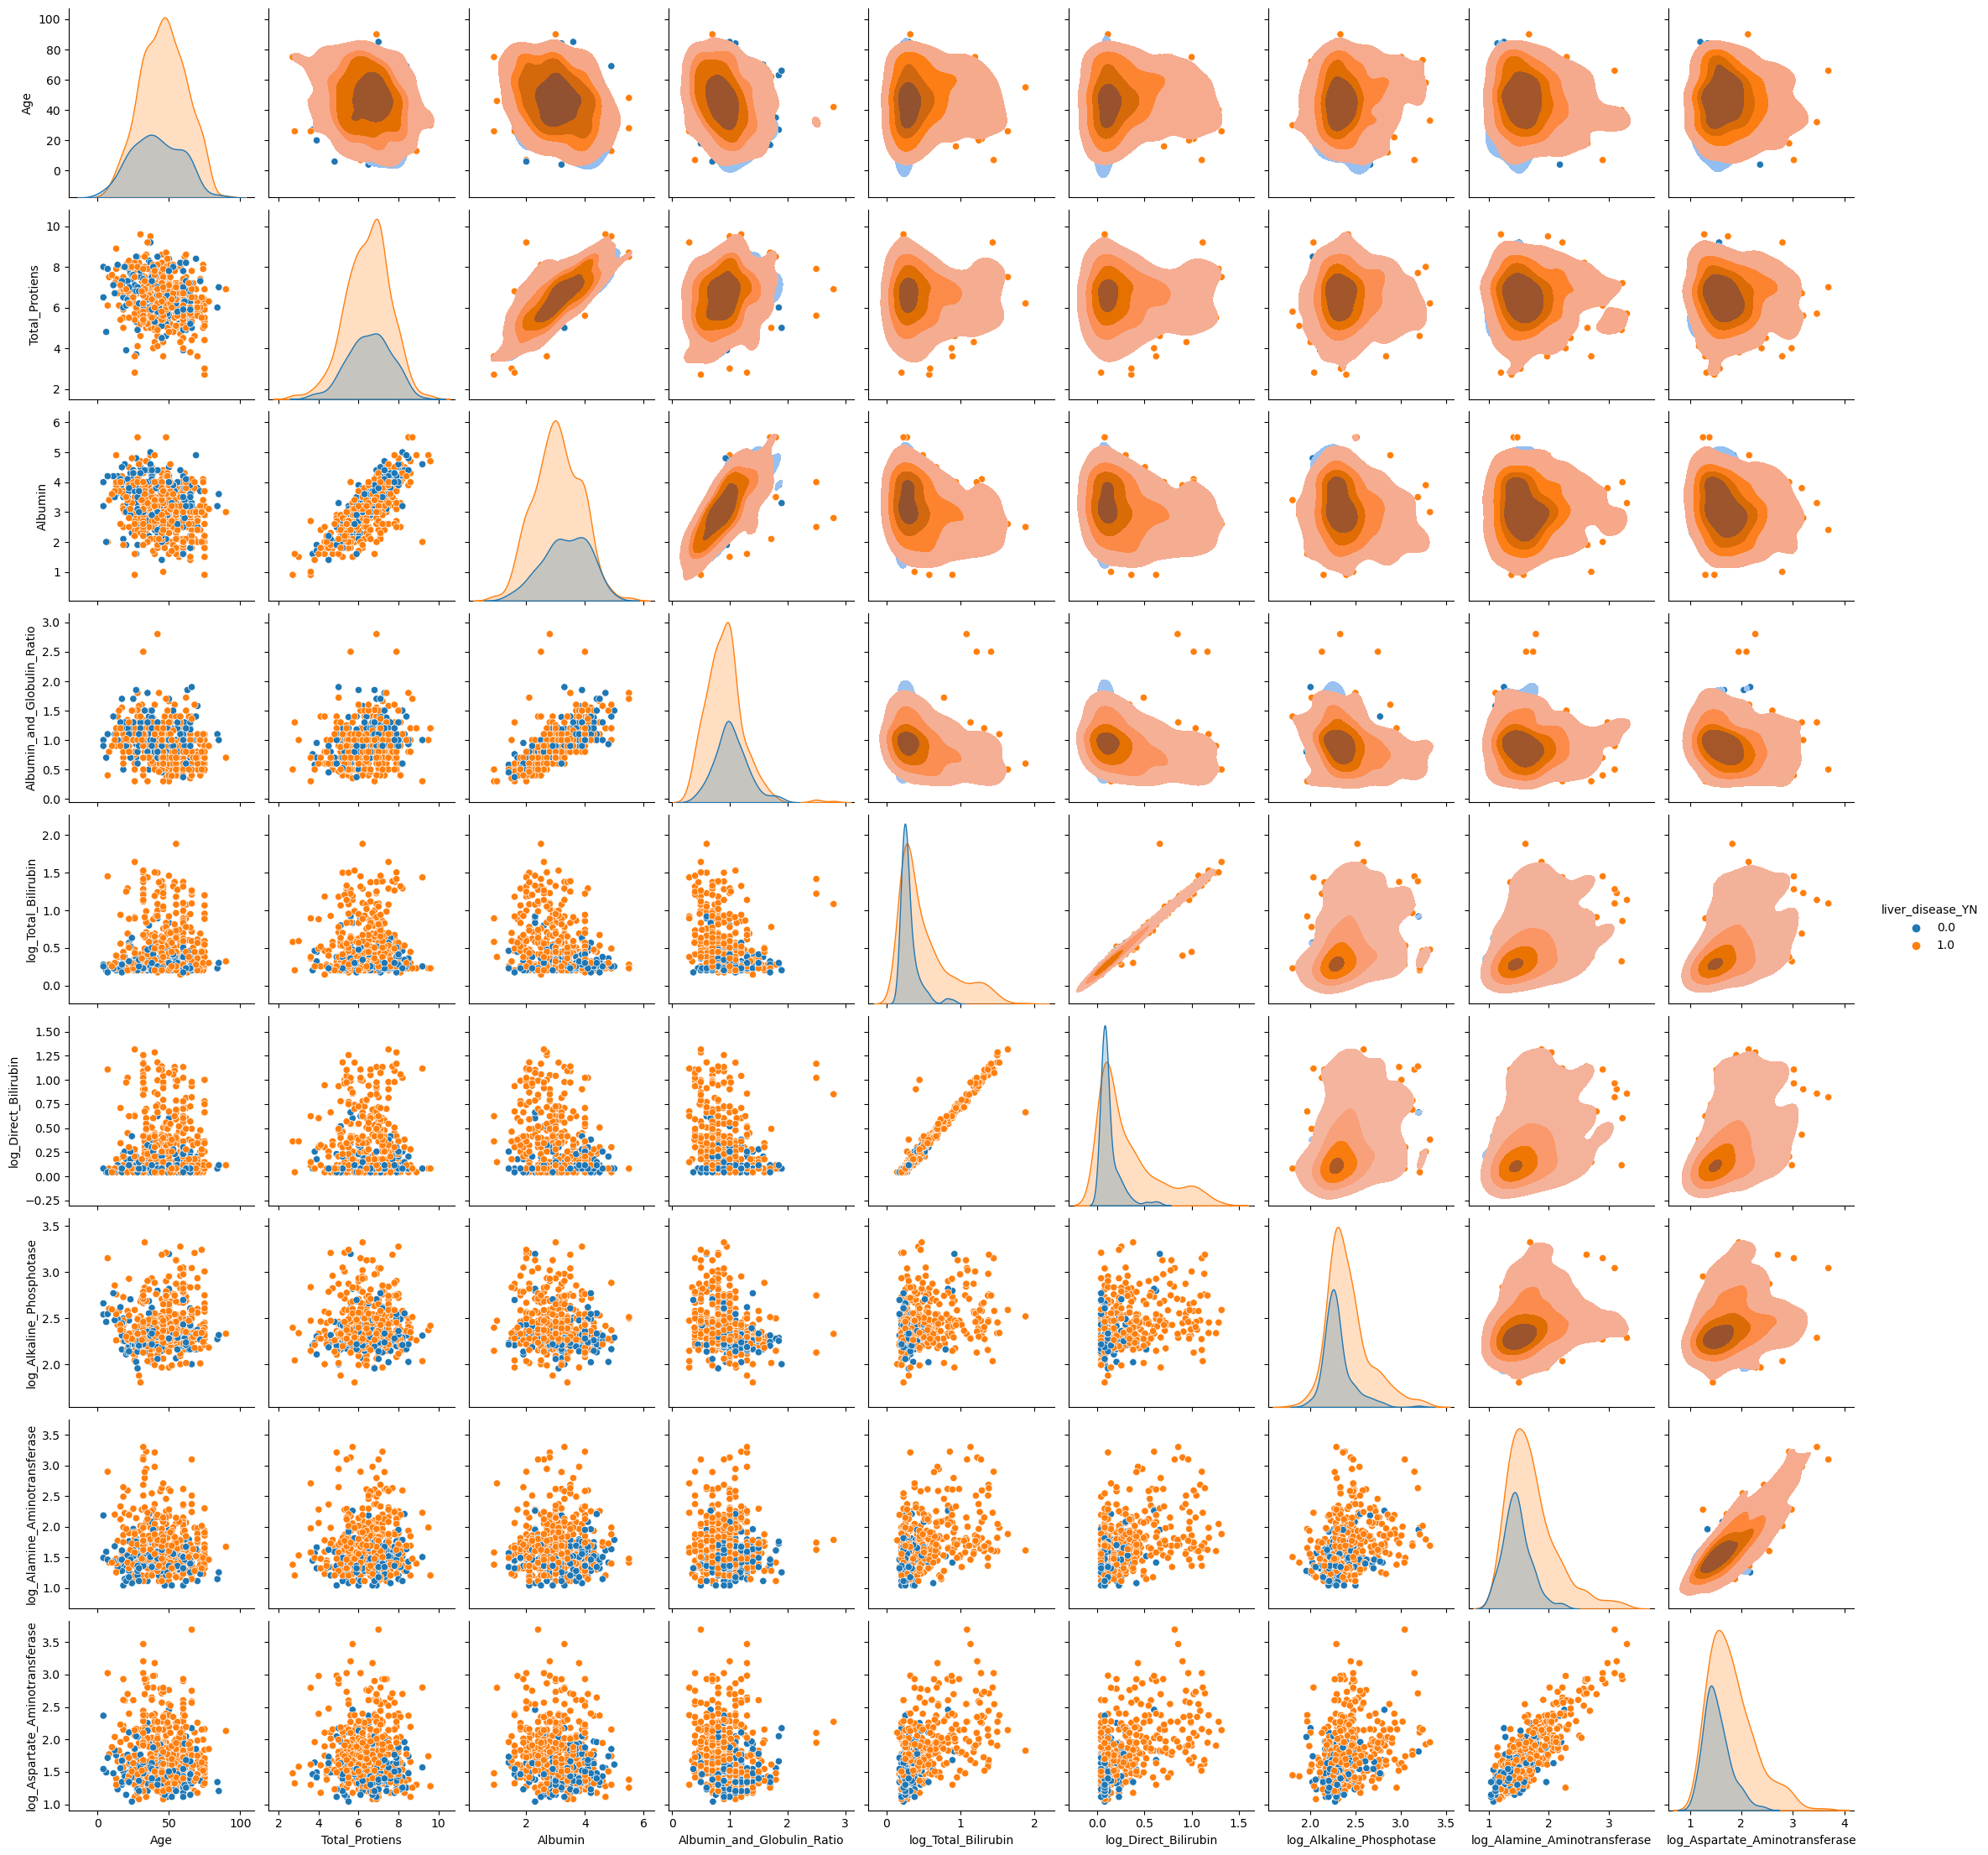

In [25]:
plt.figure(figsize=(16,20))
g = sns.pairplot(df.drop('Gender', axis = 1), hue = 'liver_disease_YN')
g.map_upper(sns.kdeplot, levels = 5, hue = df['liver_disease_YN'], fill = True)
plt.show();

#### The pairplot reveals some interesting trends in the data.
1. Only 4 feature pairs exhibit a strong collinearity.
2. The remaining pairplots do not seem to show any trends.

I will verify this with a correlation map.

In [26]:
def corr_map(df, title, method='spearman', numeric_only = True, tick_size = 10, annot_size=10, annot_kws=10):
    mask = np.triu(np.ones_like(df.corr(method=method,numeric_only=numeric_only), dtype=bool))
    heatmap = sns.heatmap(df.corr(method=method, numeric_only = numeric_only), fmt = '.2f',  annot = True, annot_kws = {'size': annot_kws}, mask=mask, cmap='BrBG')#
    plt.xticks(rotation=80, fontsize= tick_size)
    plt.yticks( fontsize= tick_size)
    
    heatmap.set_title(title, fontdict={'fontsize':annot_size}, pad=12)
    plt.show();

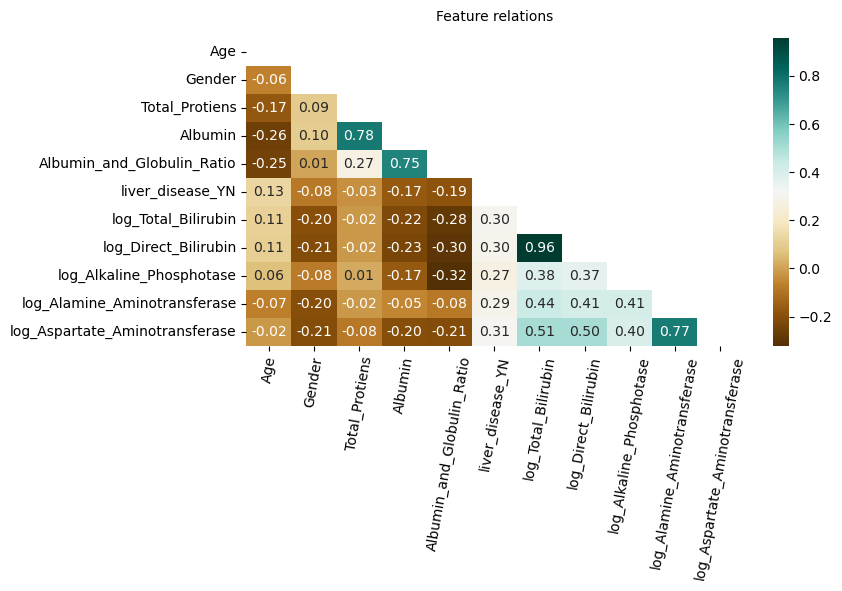

In [27]:
plt.figure(figsize=(8, 4))
corr_map(df, 'Feature relations')

#### As expected, 4 feature pairs (given below) are strongly correlated, with pair 3 having a near perfect positive correlation of 1.
    1. ('Albumin', 'Total_Protiens'), 
    2. ('Albumin', 'Albumin_and_Globulin_Ratio'),
    3. ('log_Total_Bilirubin', 'log_Direct_Bilirubin') and
    4. ('log_Alamine_Aminotransferase', 'log_Aspartate_Aminotransferase').

### Now that we've cleaned up our dataset and extracted some important insights and engineered the features, we will move on to model training and evaluation.

# 1.3 Model Training, Hyperparameter Tuning and Evaluation

In [28]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score

In [29]:
X = df.drop('liver_disease_YN', axis =1)
y = df['liver_disease_YN']

In [30]:
# Initialize StratifiedKFold class
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

#### AdaBoost Classifier

In [31]:
## Define parameter grids for GridSearchCV for AdaBoost Classifier
adaboost= AdaBoostClassifier()
adaboost_params = {'n_estimators':[215, 220, 225], 'learning_rate':[1.45, 1.5, 1.55, 1.6]}

## GridSearchCV for AdaBoost Classifier
ada_grid = GridSearchCV(adaboost, adaboost_params, cv = skf, scoring = 'precision') 
#setting scoing to precision so as to reduce False negatives in disease detection
ada_grid.fit(X,y)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [1.45, 1.5, 1.55, 1.6],
                         'n_estimators': [215, 220, 225]},
             scoring='precision')

In [32]:
print(ada_grid.best_estimator_)
print('mean_test_score:\n',ada_grid.cv_results_['mean_test_score'])

AdaBoostClassifier(learning_rate=1.5, n_estimators=220)
mean_test_score:
 [0.78775447 0.78130646 0.78537605 0.79507259 0.80152586 0.79567548
 0.78088167 0.78607515 0.78260097 0.78534836 0.78516598 0.78677019]


#### RandomForest Classifier

In [33]:
## Define parameter grids for GridSearchCV for RandomForest Classifier
randomforest = RandomForestClassifier()
rf_params = {'max_depth': [None, 20, 25, 26, 27, 28], 'n_estimators':[165, 170, 180, 190, 200, 220], 'warm_start':[True, False]}

## GridSearchCV for RandomForest Classifier
rf_grid = GridSearchCV(randomforest, rf_params, cv = skf, scoring = 'precision')
rf_grid.fit(X,y)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 20, 25, 26, 27, 28],
                         'n_estimators': [165, 170, 180, 190, 200, 220],
                         'warm_start': [True, False]},
             scoring='precision')

In [34]:
print(rf_grid.best_estimator_)
print('mean_test_score:\n',rf_grid.cv_results_['mean_test_score'])

RandomForestClassifier(n_estimators=220, warm_start=True)
mean_test_score:
 [0.76504679 0.77003983 0.75997949 0.75794559 0.76447368 0.76390657
 0.76720244 0.76044781 0.77112106 0.75794114 0.77287965 0.75820188
 0.76536146 0.76558873 0.76327667 0.7639835  0.76259468 0.75599199
 0.76997249 0.76649575 0.7669495  0.76021667 0.76661556 0.75827106
 0.76652023 0.75909606 0.76013369 0.76873181 0.76953482 0.76389787
 0.77246795 0.76928206 0.76114758 0.76452007 0.76476123 0.76885065
 0.7563838  0.75758006 0.76106435 0.76797593 0.75292956 0.76196595
 0.76510159 0.76418749 0.76288066 0.76934345 0.7668952  0.76554306
 0.76213812 0.76202651 0.76507349 0.76961472 0.77064187 0.7727912
 0.77154216 0.75988541 0.76517088 0.76720931 0.77117118 0.76599772
 0.75506802 0.76362065 0.75964832 0.76572444 0.76369031 0.76151521
 0.75690852 0.76527452 0.75934724 0.76091658 0.76796654 0.76257931]


In [35]:
# Evaluate the models using cross-validation scores
adaboost_scores = ada_grid.cv_results_['mean_test_score']
random_forest_scores = rf_grid.cv_results_['mean_test_score']

# Print the cross-validation scores
print("Cross-validation scores for AdaBoostClassifier:")
print(adaboost_scores, '\n\n')
print("Cross-validation scores for RandomForestClassifier:")
print(random_forest_scores, '\n\n')

# Print the best parameters for each model
print("Best parameters for AdaBoostClassifier:", ada_grid.best_params_)
print("Best parameters for RandomForestClassifier:", rf_grid.best_params_)


Cross-validation scores for AdaBoostClassifier:
[0.78775447 0.78130646 0.78537605 0.79507259 0.80152586 0.79567548
 0.78088167 0.78607515 0.78260097 0.78534836 0.78516598 0.78677019] 


Cross-validation scores for RandomForestClassifier:
[0.76504679 0.77003983 0.75997949 0.75794559 0.76447368 0.76390657
 0.76720244 0.76044781 0.77112106 0.75794114 0.77287965 0.75820188
 0.76536146 0.76558873 0.76327667 0.7639835  0.76259468 0.75599199
 0.76997249 0.76649575 0.7669495  0.76021667 0.76661556 0.75827106
 0.76652023 0.75909606 0.76013369 0.76873181 0.76953482 0.76389787
 0.77246795 0.76928206 0.76114758 0.76452007 0.76476123 0.76885065
 0.7563838  0.75758006 0.76106435 0.76797593 0.75292956 0.76196595
 0.76510159 0.76418749 0.76288066 0.76934345 0.7668952  0.76554306
 0.76213812 0.76202651 0.76507349 0.76961472 0.77064187 0.7727912
 0.77154216 0.75988541 0.76517088 0.76720931 0.77117118 0.76599772
 0.75506802 0.76362065 0.75964832 0.76572444 0.76369031 0.76151521
 0.75690852 0.76527452 0.7

In [36]:
np.mean(adaboost_scores), np.mean(random_forest_scores)

(0.7877961017007311, 0.7641780741916528)

In [37]:
np.median(adaboost_scores), np.median(random_forest_scores)

(0.7857255972779442, 0.764496872293726)

# 1.4 Conclusion: Comparison of Estimators
 After multiple rounds of hyperparameter tuning and refitting, we have found that **Adaboost Classifier is marginally better than Random Forest Classifier**. 
 
 In GridSearchCV for both classifiers, I have chosen the value for **scoring as precision**, since my primary goal is **to minimize false negatives.** 

**Hyperparameter tuning** for both Classifiers has **improved mean accuracies from ~70% to the the present values of 78% and 76% each.** There might be a scope for improvement in model scores with different hyperparameters and estimators. 

The **loss in accuracy** may be explained by our observation during the EDA that there's a s**ignificant overlap in the IQR of the boxplots** among features, when grouped by Gender and Diseased_YN feature. The **pairplots and correlation heatmaps have reconfirmed** this as the scatters and kde plots show significant overlaps and low correlation among feature pairs.